In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# 1. Excel-Datei laden
file_path = "output.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Datei erfolgreich geladen.")
except FileNotFoundError:
    print("Datei nicht gefunden. Stelle sicher, dass sie im richtigen Verzeichnis liegt.")
    df = None

Datei erfolgreich geladen.


Analyse abgeschlossen für Vergleich Pixtral:
Counter({'richtig': 352, 'FALSCH': 31, 'falsche formel': 28})
Anzahl Zeilen mit Formeln in Spalte C für Vergleich Pixtral: 31
Analyse für Fälle mit Formeln in Spalte C für Vergleich Pixtral:
richtig: 35 (46.05%)
FALSCH: 13 (17.11%)
falsche formel: 28 (36.84%)
Analyse abgeschlossen für Vergleich Nougat:
Counter({'richtig': 399, 'FALSCH': 7})
Anzahl Zeilen mit Formeln in Spalte C für Vergleich Nougat: 31
Analyse für Fälle mit Formeln in Spalte C für Vergleich Nougat:
richtig: 64 (84.21%)
FALSCH: 7 (9.21%)
falsche formel: 0 (0.00%)


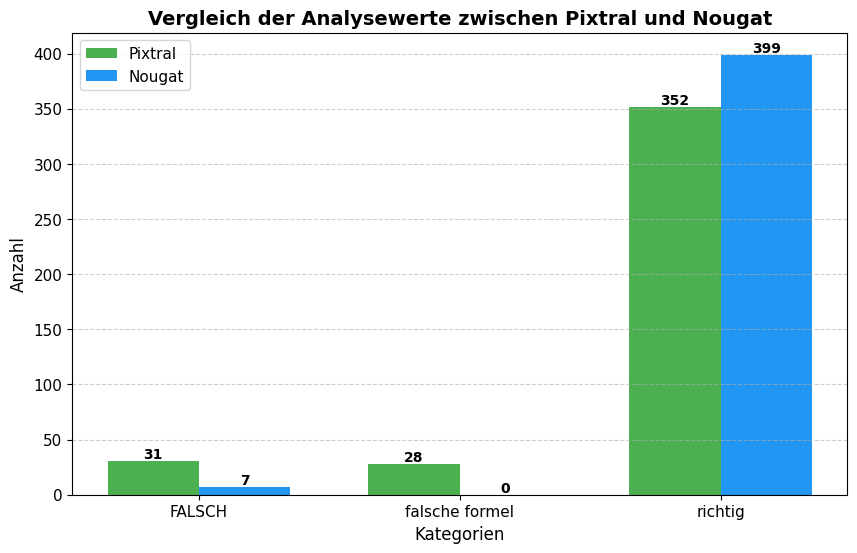

In [ ]:
# 2. Daten analysieren
if df is not None:
    vergleich_counts = {}
    
    for spalte in ["Vergleich Pixtral", "Vergleich Nougat"]:
        # Alle Werte in der jeweiligen Vergleichsspalte splitten und zählen
        all_values = df[spalte].dropna().str.split(",").explode().str.strip()
        all_values = all_values[all_values != "nan"]  # Entfernt explizite 'nan'-Strings
        vergleich_counts[spalte] = Counter(all_values)
        
        print(f"Analyse abgeschlossen für {spalte}:")
        print(vergleich_counts[spalte])
        
        # Zusätzliche Analyse für Fälle mit Formeln in Spalte C
        df_formeln = df[df["Ground Truth"].notna() & (df["Ground Truth"] != "keine")]
        total_rows_with_formulas = len(df_formeln)
        print(f"Anzahl Zeilen mit Formeln in Spalte C für {spalte}: {total_rows_with_formulas}")
        
        formel_values = df_formeln[spalte].dropna().str.split(",").explode().str.strip()
        formel_counts = Counter(formel_values)
        
        print(f"Analyse für Fälle mit Formeln in Spalte C für {spalte}:")
        for key in ["richtig", "FALSCH", "falsche formel"]:
            count = formel_counts.get(key, 0)
            percentage = (count / 76) * 100 if total_rows_with_formulas > 0 else 0
            print(f"{key}: {count} ({percentage:.2f}%)")

    # 3. Visualisierung
if vergleich_counts:
    kategorien = sorted(set(vergleich_counts["Vergleich Pixtral"].keys()).union(vergleich_counts["Vergleich Nougat"].keys()))
    
    pixtral_counts = [vergleich_counts["Vergleich Pixtral"].get(k, 0) for k in kategorien]
    nougat_counts = [vergleich_counts["Vergleich Nougat"].get(k, 0) for k in kategorien]
    
    x = range(len(kategorien))
    bar_width = 0.35  # Breite der Balken

    plt.figure(figsize=(10, 6))
    
    # Balken mit Versatz für bessere Sichtbarkeit
    bars1 = plt.bar([pos - bar_width / 2 for pos in x], pixtral_counts, width=bar_width, label="Pixtral", color="#4CAF50")
    bars2 = plt.bar([pos + bar_width / 2 for pos in x], nougat_counts, width=bar_width, label="Nougat", color="#2196F3")
    
    # Werte über die Balken schreiben
    for bars in [bars1, bars2]:
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')

    plt.xlabel("Kategorien", fontsize=12)
    plt.ylabel("Anzahl", fontsize=12)
    plt.title("Vergleich der Analysewerte zwischen Pixtral und Nougat", fontsize=14, fontweight='bold')
    plt.xticks(ticks=x, labels=kategorien, rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(fontsize=11)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    plt.show()
else:
    print("Keine Daten zum Plotten verfügbar.")
    

